In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Conv2D, Conv1D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow import keras, config
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print("GPUs Available: ", len(config.list_physical_devices('GPU')))

GPUs Available:  1


In [9]:
# Global settings
IMAGE_TARGET_SIZE = (5, 1400, 1)
BATCH_SIZE =  128

In [10]:

%load_ext autoreload
%autoreload 2

from morse_helpers import create_sets
from morse_label_funcs import  labels_to_one_hot_positions_categorical, letter_n_to_one_hot_positions_categorical, position_regression

(image_fnames, morse_labels) = create_sets(
    [
        ["./training_data/MorseTrainSet_04/GEN04_VER_000/", 'wordsMatrices_04_000', "Words_04_000.csv"],
        # ["./training_data/MorseTrainSet_04/GEN04_VER_100/", 'wordsMatrices_04_100', "Words_04_100.csv"],
        # ["./training_data/MorseTrainSet_04/GEN04_VER_200/", 'wordsMatrices_04_200', "Words_04_200.csv"],
        # ["./training_data/MorseTrainSet_04/GEN04_VER_210/", 'wordsMatrices_04_210', "Words_04_210.csv"],
        # ["./training_data/MorseTrainSet_04/GEN04_VER_220/", 'wordsMatrices_04_220', "Words_04_220.csv"],

        # ["./training_data/MorseTrainSet_11/GEN11_VER_000/", 'wordsMatrices_11_000', "Words_11_000.csv"],
        # ["./training_data/MorseTrainSet_11/GEN11_VER_100/", 'wordsMatrices_11_100', "Words_11_100.csv"],
        # ["./training_data/MorseTrainSet_11/GEN11_VER_200/", 'wordsMatrices_11_200', "Words_11_200.csv"],
        # ["./training_data/MorseTrainSet_11/GEN11_VER_210/", 'wordsMatrices_11_210', "Words_11_210.csv"],
        # ["./training_data/MorseTrainSet_11/GEN11_VER_220/", 'wordsMatrices_11_220', "Words_11_220.csv"],

    ], 
    IMAGE_TARGET_SIZE,
    position_regression,
    letter_n=1
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1400


In [11]:
from morse_helpers import create_all_sets

TEST_SPLIT_SIZE = 0.90
VALIDATION_SPLIT_SIZE = 0.90

train, labels, train_validation, labels_validation, train_test, labels_test = create_all_sets(
    image_fnames, morse_labels, TEST_SPLIT_SIZE, VALIDATION_SPLIT_SIZE, shuffle_before_test_split=True)

In [12]:
from morse_helpers import Image_Generator, zeropad_randomly

training_batch_generator = Image_Generator(train, labels, BATCH_SIZE, IMAGE_TARGET_SIZE, [zeropad_randomly])
validation_batch_generator = Image_Generator(train_validation, labels_validation, BATCH_SIZE, IMAGE_TARGET_SIZE, [zeropad_randomly])
test_batch_generator = Image_Generator(train_test, labels_test, BATCH_SIZE, IMAGE_TARGET_SIZE, [])

In [13]:
# t, l = training_batch_generator.__getitem__(0)

# for i in range(10):
#     print(l[i] * 1400)
#     fig = plt.figure(figsize=(30,5))
#     plt.xlim(0, 800)
#     rolled = np.pad(t[i], [(0,0),(0,0), (0,0)], mode='constant')[:, 0:-1]
#     rolled[:, int(l[i] * 1400)] = 1
#     plt.imshow(rolled)
#     plt.show()

In [14]:

input_layer     = Input(shape=IMAGE_TARGET_SIZE)
cropped = keras.layers.Cropping2D(cropping=((0, 0), (0,1000)), data_format=None)(input_layer)
pool           = MaxPooling2D(pool_size=(2,2),padding="same")(cropped)

conv1           = Conv2D(80,(3,5),padding="same",activation="relu")(pool)
pool1           = MaxPooling2D(pool_size=(2,2),padding="same")(conv1)

conv2           = Conv2D(80,(1,7),padding="same",activation="relu")(pool1)
pool2           = MaxPooling2D(pool_size=(1,2),padding="same")(conv2)

conv3           = Conv2D(80,(1,11),padding="same",activation="relu")(pool2)
pool3           = MaxPooling2D(pool_size=(1,2),padding="same")(conv3)

conv4           = Conv2D(80,(1,13),padding="same",activation="relu")(pool3)
pool4           = MaxPooling2D(pool_size=(1,2),padding="same")(conv4)

conv5           = Conv2D(80,(1,11),padding="same",activation="relu")(pool4)
pool5           = MaxPooling2D(pool_size=(1,2),padding="same")(conv5)

conv6           = Conv2D(80,(1,9),padding="same",activation="relu")(pool5)
pool6           = MaxPooling2D(pool_size=(1,2),padding="same")(conv6)

conv7           = Conv2D(80,(1,5),padding="same",activation="relu")(pool6)
pool7           = MaxPooling2D(pool_size=(1,2),padding="same")(conv7)

flat            = Flatten()(pool7)

output_layer    = Dense(1)(flat)
model           = Model(inputs=input_layer, outputs=output_layer)
print(model.summary())
model.compile(loss='mse', optimizer='adam', metrics=["mean_absolute_error"])

init_epoch = 0

2021-11-05 01:24:30.547171: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-05 01:24:30.548193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-11-05 01:24:30.548220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.835GHz coreCount: 15 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 238.66GiB/s
2021-11-05 01:24:30.548566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devi

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1400, 1)]      0         
_________________________________________________________________
cropping2d (Cropping2D)      (None, 5, 400, 1)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 200, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 200, 80)        1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 100, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 100, 80)        44880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 50, 80)         0     

In [16]:

NUM_EPOCHS = 5

def fit_model(epochs):
	
	global init_epoch
	history = model.fit_generator(generator = training_batch_generator,
	                   steps_per_epoch = int(len(train) // BATCH_SIZE),
	                   epochs = epochs + init_epoch,
					   initial_epoch=init_epoch,
	                   verbose =1,
	                   validation_data = validation_batch_generator,
	                   validation_steps = int(len(train_validation) // BATCH_SIZE))
	
	
	init_epoch += epochs
	return history

history = fit_model(NUM_EPOCHS)


/home/nig/miniconda3/envs/newenv/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-11-05 01:24:55.086783: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-05 01:24:55.087074: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3791995000 Hz


Epoch 1/5


2021-11-05 01:24:55.557616: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-11-05 01:24:56.587392: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8204
2021-11-05 01:24:57.841398: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-05 01:24:59.346852: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


126/126 [==============================] - 11s 44ms/step - loss: 3.9984e-04 - mean_absolute_error: 0.0123 - val_loss: 1.1757e-04 - val_mean_absolute_error: 0.0089
Epoch 2/5
126/126 [==============================] - 4s 30ms/step - loss: 6.2689e-05 - mean_absolute_error: 0.0057 - val_loss: 8.5906e-06 - val_mean_absolute_error: 0.0022
Epoch 3/5
126/126 [==============================] - 4s 33ms/step - loss: 5.5146e-06 - mean_absolute_error: 0.0017 - val_loss: 3.8911e-06 - val_mean_absolute_error: 0.0012
Epoch 4/5
126/126 [==============================] - 4s 30ms/step - loss: 2.1653e-06 - mean_absolute_error: 0.0011 - val_loss: 2.0469e-06 - val_mean_absolute_error: 0.0010
Epoch 5/5
126/126 [==============================] - 4s 30ms/step - loss: 2.0501e-06 - mean_absolute_error: 0.0011 - val_loss: 3.7137e-06 - val_mean_absolute_error: 0.0014


In [17]:
predictions = model.predict_generator(generator=test_batch_generator)

/home/nig/miniconda3/envs/newenv/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [18]:
def show_image(img):
    fig = plt.figure(figsize=(30,5))
    plt.xlim(0, 400)
    plt.imshow(img)
    plt.show()
    return fig

In [19]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)

def get_deviating_predictions(above_pixels):
    regression_differences = []
    indexer = 0

    for imgs_batch, labels_batch in test_batch_generator:

        for i in range(len(imgs_batch)):

            pred = predictions[indexer] * IMAGE_TARGET_SIZE[1]
            test_label = labels_batch[i] * IMAGE_TARGET_SIZE[1]

            if abs(pred - test_label) > above_pixels:
                regression_differences.append([pred, test_label, imgs_batch[i]])

            indexer += 1

    return regression_differences

above_pixels = 3

deviating_predictions = get_deviating_predictions(above_pixels=above_pixels)

print("Total predictions", len(predictions))
print("Total predictions off by more than pixels", above_pixels, " : ", len(deviating_predictions))
print("Percentage incorrect", round( (len(deviating_predictions) / len(predictions) * 100), 2), "%")

Total predictions 2000
Total predictions off by more than pixels 3  :  82
Percentage incorrect 4.1 %


Prediction [34.834286]


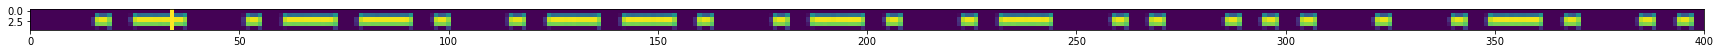

Correct 38.0


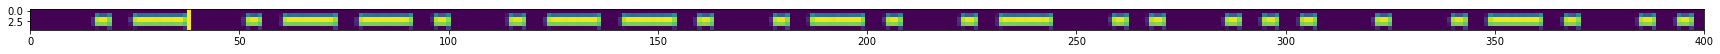

----------------------------------------------------------------------------------------
Prediction [64.688065]


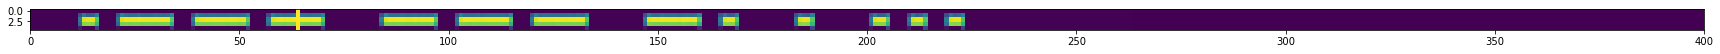

Correct 71.0


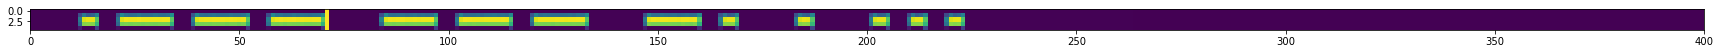

----------------------------------------------------------------------------------------
Prediction [70.41178]


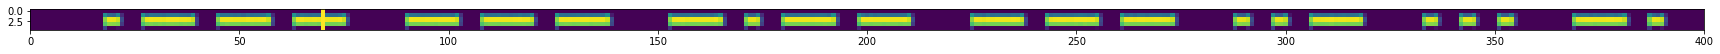

Correct 76.0


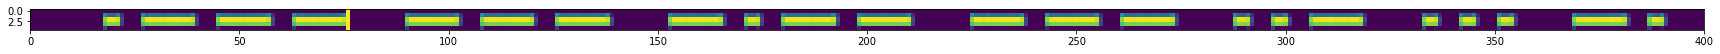

----------------------------------------------------------------------------------------
Prediction [67.97354]


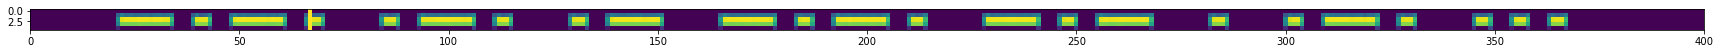

Correct 71.0


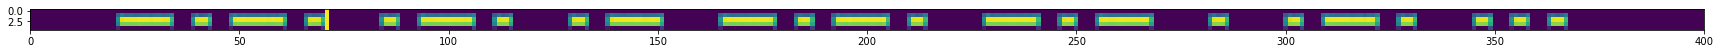

----------------------------------------------------------------------------------------
Prediction [18.951368]


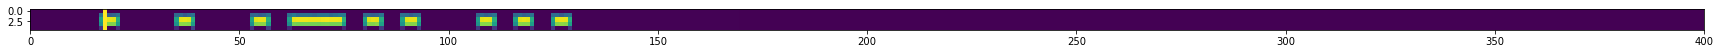

Correct 22.0


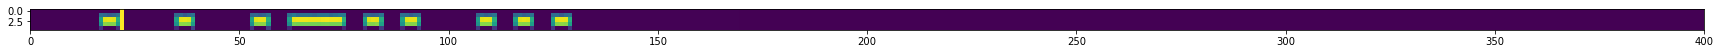

----------------------------------------------------------------------------------------
Prediction [40.78278]


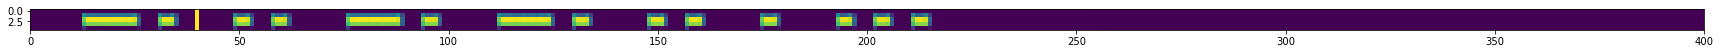

Correct 35.0


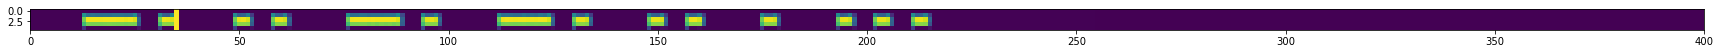

----------------------------------------------------------------------------------------
Prediction [22.987486]


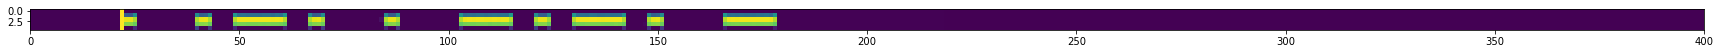

Correct 26.0


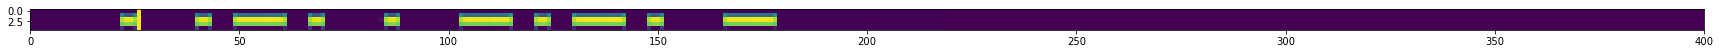

----------------------------------------------------------------------------------------
Prediction [67.32216]


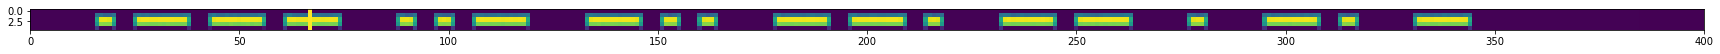

Correct 75.0


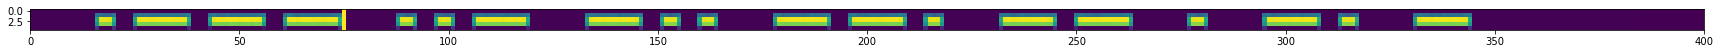

----------------------------------------------------------------------------------------
Prediction [71.92156]


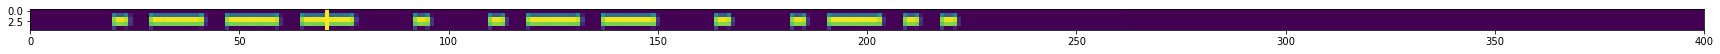

Correct 78.0


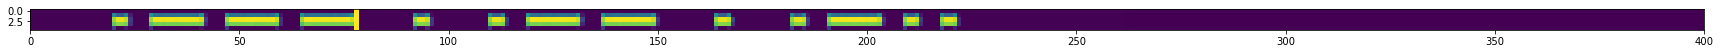

----------------------------------------------------------------------------------------
Prediction [40.67505]


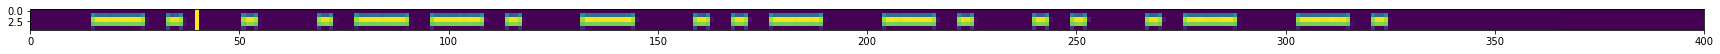

Correct 37.0


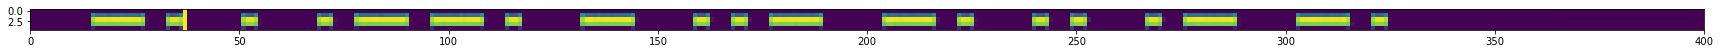

----------------------------------------------------------------------------------------
Prediction [69.67375]


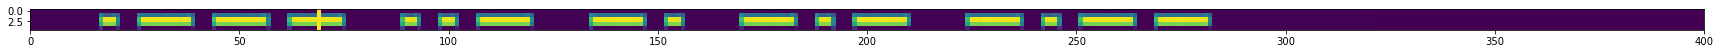

Correct 76.0


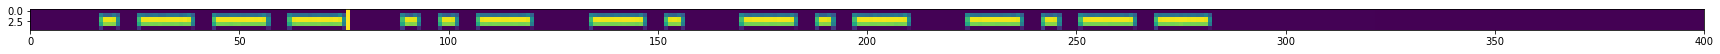

----------------------------------------------------------------------------------------
Prediction [40.06354]


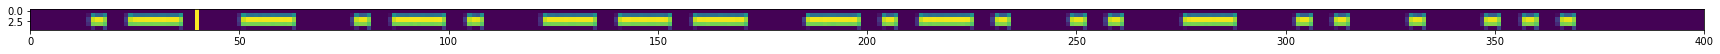

Correct 37.0


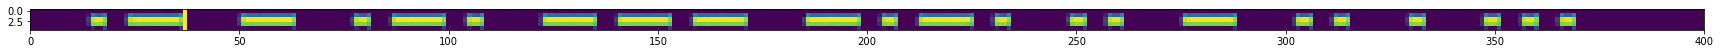

----------------------------------------------------------------------------------------
Prediction [67.26291]


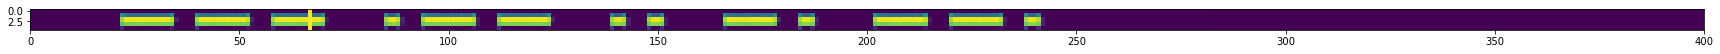

Correct 71.0


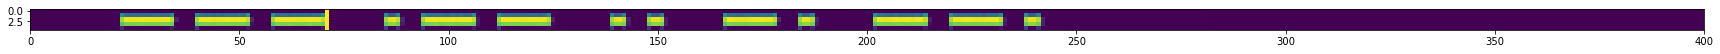

----------------------------------------------------------------------------------------
Prediction [64.51778]


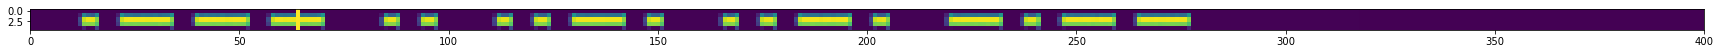

Correct 71.0


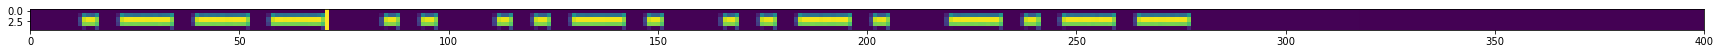

----------------------------------------------------------------------------------------
Prediction [69.17143]


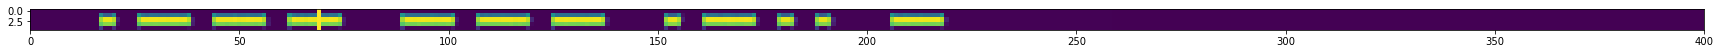

Correct 75.0


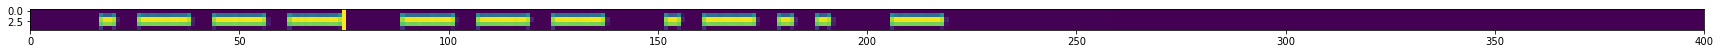

----------------------------------------------------------------------------------------
Prediction [73.32558]


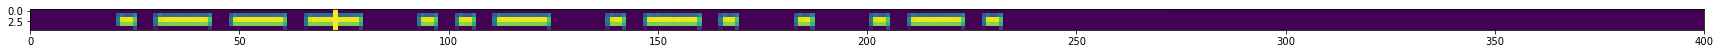

Correct 80.0


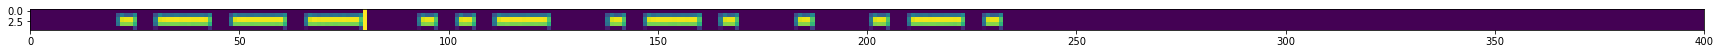

----------------------------------------------------------------------------------------
Prediction [67.23379]


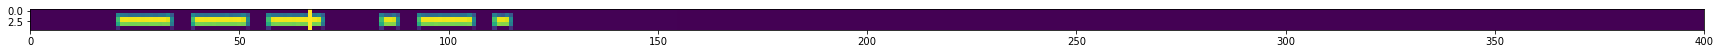

Correct 71.0


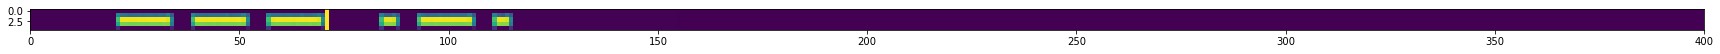

----------------------------------------------------------------------------------------
Prediction [20.826872]


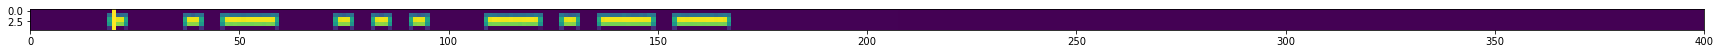

Correct 24.0


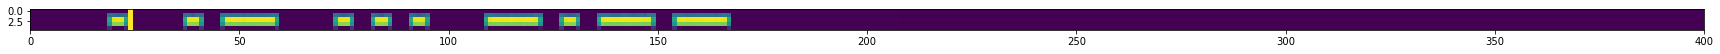

----------------------------------------------------------------------------------------
Prediction [67.565926]


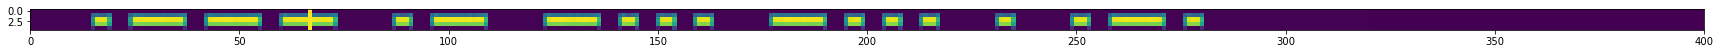

Correct 74.0


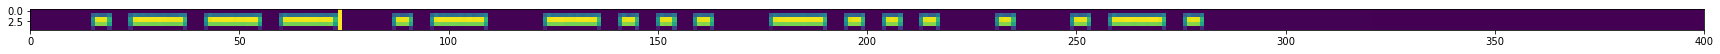

----------------------------------------------------------------------------------------
Prediction [66.93652]


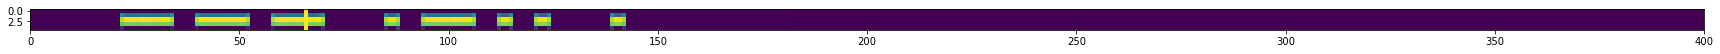

Correct 71.0


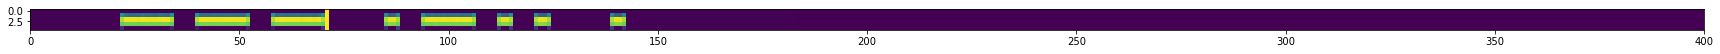

----------------------------------------------------------------------------------------
Prediction [39.9286]


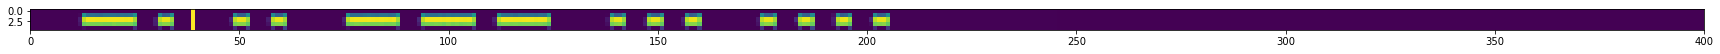

Correct 35.0


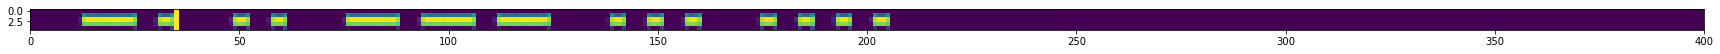

----------------------------------------------------------------------------------------
Prediction [67.74437]


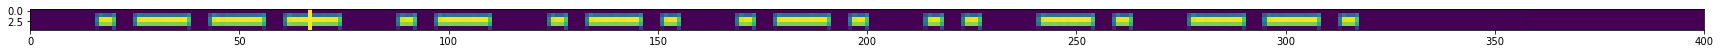

Correct 75.0


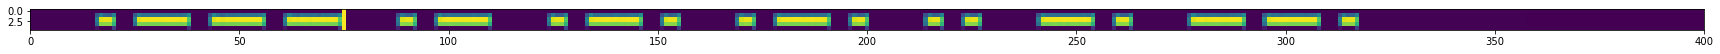

----------------------------------------------------------------------------------------
Prediction [68.657555]


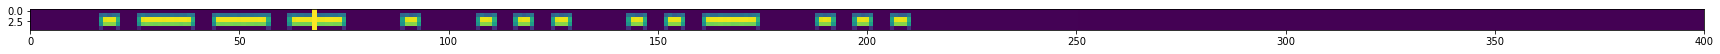

Correct 76.0


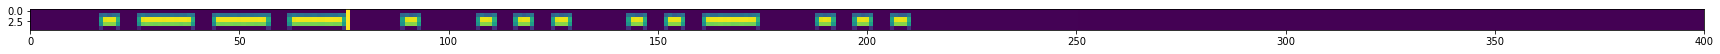

----------------------------------------------------------------------------------------
Prediction [72.91245]


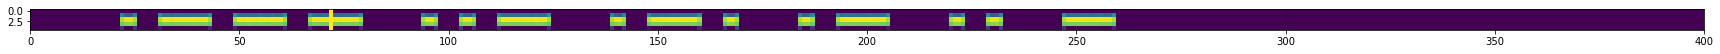

Correct 80.0


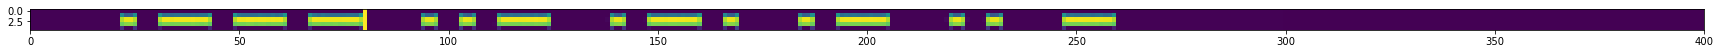

----------------------------------------------------------------------------------------
Prediction [36.792286]


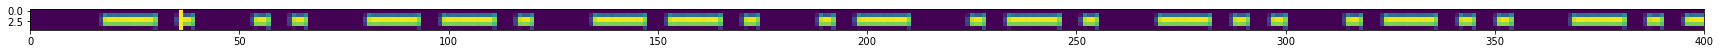

Correct 40.0


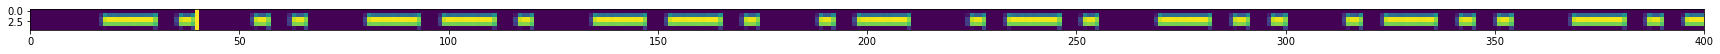

----------------------------------------------------------------------------------------
Prediction [56.27874]


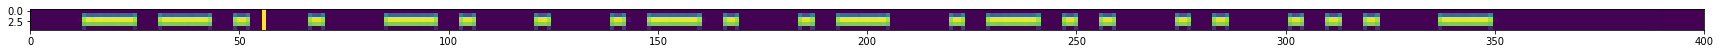

Correct 53.00000000000001


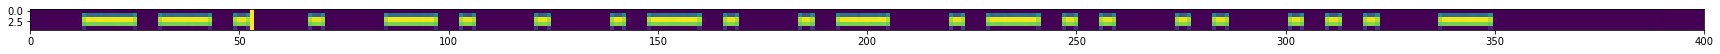

----------------------------------------------------------------------------------------
Prediction [39.38848]


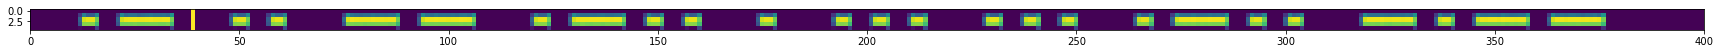

Correct 35.0


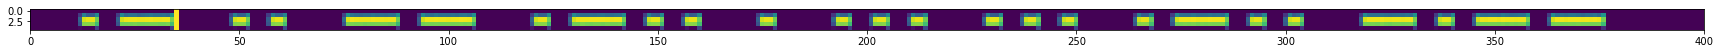

----------------------------------------------------------------------------------------
Prediction [26.124771]


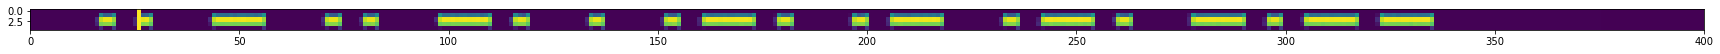

Correct 30.0


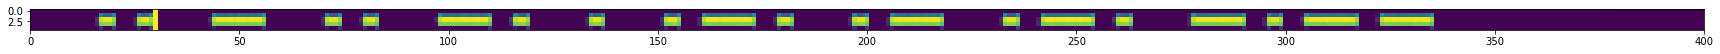

----------------------------------------------------------------------------------------
Prediction [40.92182]


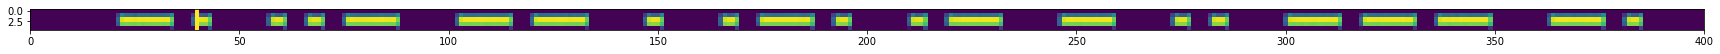

Correct 44.0


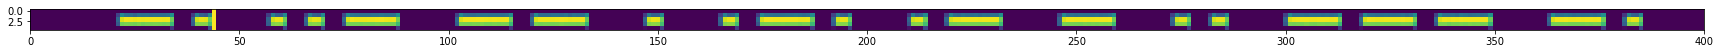

----------------------------------------------------------------------------------------
Prediction [27.719172]


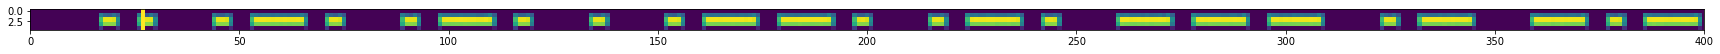

Correct 30.999999999999996


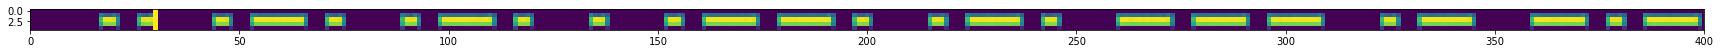

----------------------------------------------------------------------------------------


In [20]:

counter = 0   
for diff in deviating_predictions:

    counter += 1
    if counter > 30:
        break

    pred, correct, img = diff

    img_pred = img.copy()
    img_correct = img.copy()

    print('Prediction', pred)
    img_pred[:, int(pred)] = 1
    show_image(img_pred)

    print('Correct', correct)
    img_correct[:, int(correct)] = 1
    show_image(img_correct)

    print("----------------------------------------------------------------------------------------")


In [21]:
import matplotlib.backends.backend_pdf as mpt

def right_roll_image_by_n(img, roll_value_n):
    return np.roll(img, roll_value_n, axis=1)

def get_label_prediction(img, model, img_width): 
    x_right_rolled_exp_dim = np.expand_dims(img, axis=0)
    single_predict = model.predict(x_right_rolled_exp_dim)
    return single_predict[0] * img_width



def roll_and_display_img(img, indexer):

    image_right_rolled = right_roll_image_by_n(img, int(-10 + (indexer / 5)))

    label_prediction = get_label_prediction(image_right_rolled, model, IMAGE_TARGET_SIZE[1])

    # Draw vertical line
    image_right_rolled[:, int(label_prediction)] = 1

    fig = show_image(image_right_rolled)
    pdf.savefig( fig )


In [22]:
%%capture 
# capture means suppress output

pdf = mpt.PdfPages("single_predictions_rolled_randomly.pdf")

single_image_batch, single_label_batch = test_batch_generator.__getitem__(0)

for i in range(len(single_image_batch)):
    roll_and_display_img(single_image_batch[i], i)
    
pdf.close()